Load the Cleaned Dataset

In [16]:
import pandas as pd

dataset = pd.read_csv(r"C:\Users\acer\OneDrive\Desktop\DS_INTERN\US_Accidents_Cleaned_dataset.csv")
dataset.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Hour,Weekday,Month
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,Night,Night,Night,Night,5,Monday,February
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,Night,Night,Night,Day,6,Monday,February
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,True,False,Night,Night,Day,Day,6,Monday,February
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,Night,Day,Day,Day,7,Monday,February
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,True,False,Day,Day,Day,Day,7,Monday,February


In [17]:
dataset["Visibility(mi)"].describe()
dataset["Visibility(mi)"].value_counts().head()

Visibility(mi)
10.0    6278174
7.0      217027
9.0      188529
8.0      149975
5.0      144153
Name: count, dtype: int64

# Univariate Analysis

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (6,3)

1. Severity Distribution

C:\Users\acer\AppData\Local\Temp\ipykernel_3820\1034285274.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


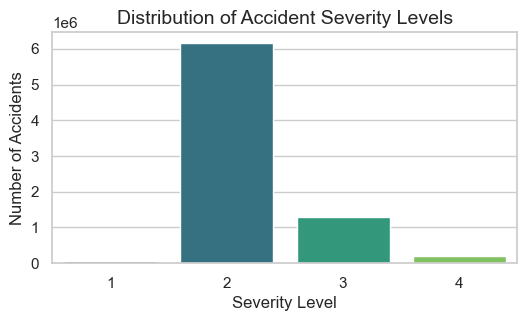

In [19]:

sns.countplot(
    x="Severity",
    data=dataset,
    palette="viridis"
)
plt.title("Distribution of Accident Severity Levels", fontsize=14)
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.show()


2. Accidents by Time of Day (Hour)

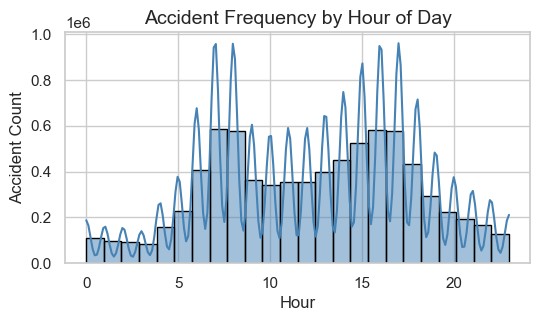

In [20]:
sns.histplot(
    dataset["Hour"],
    bins=24,
    kde=True,
    color="steelblue",
    edgecolor="black"
)
plt.title("Accident Frequency by Hour of Day", fontsize=14)
plt.xlabel("Hour")
plt.ylabel("Accident Count")
plt.show()


3. Accidents by Day of Week

C:\Users\acer\AppData\Local\Temp\ipykernel_3820\2401118722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


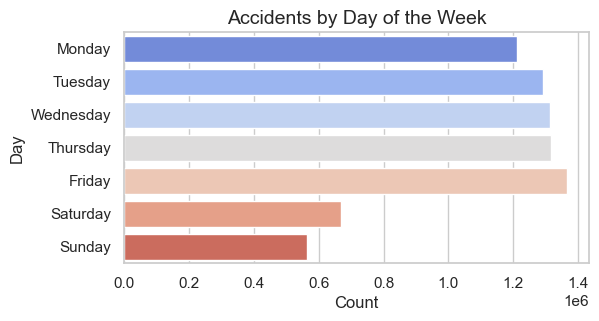

In [21]:
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

sns.countplot(
    y="Weekday",
    data=dataset,
    order=order,
    palette="coolwarm"
)
plt.title("Accidents by Day of the Week", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Day")
plt.show()


4. Accidents by Month

C:\Users\acer\AppData\Local\Temp\ipykernel_3820\3107675418.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


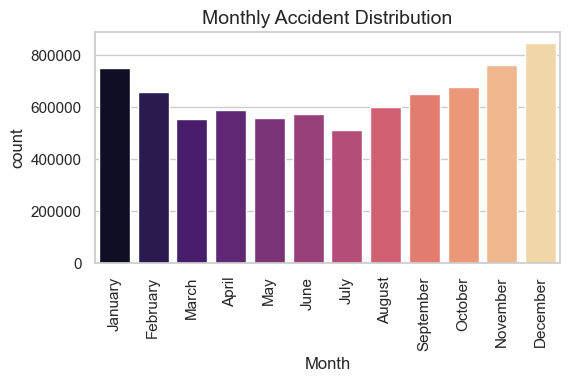

In [22]:
sns.countplot(
    x="Month",
    data=dataset,
    order=[
        "January","February","March","April","May","June",
        "July","August","September","October","November","December"
    ],
    palette="magma"
)
plt.xticks(rotation=90)
plt.title("Monthly Accident Distribution", fontsize=14)
plt.show()


5. Top Weather Conditions During Accidents

C:\Users\acer\AppData\Local\Temp\ipykernel_3820\3200134842.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


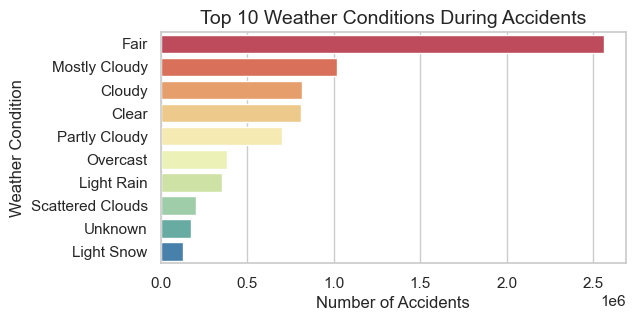

In [23]:
top_weather = dataset["Weather_Condition"].value_counts().head(10)

sns.barplot(
    x=top_weather.values,
    y=top_weather.index,
    palette="Spectral"
)
plt.title("Top 10 Weather Conditions During Accidents", fontsize=14)
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.show()


# Bivariate Analysis

1.Severity vs Visibility

C:\Users\acer\AppData\Local\Temp\ipykernel_3820\4205606927.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=dataset, x='Severity', y='Visibility(mi)', palette='coolwarm', inner='quartile')


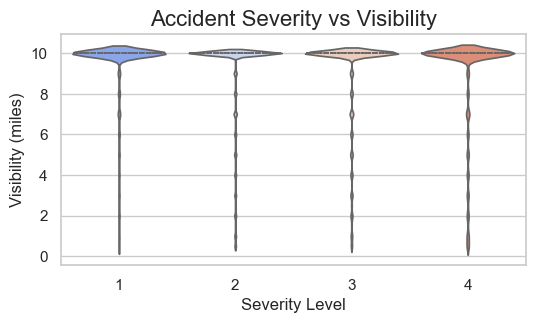

In [28]:
sns.violinplot(data=dataset, x='Severity', y='Visibility(mi)', palette='coolwarm', inner='quartile')

plt.title('Accident Severity vs Visibility', fontsize=16)
plt.xlabel('Severity Level', fontsize=12)
plt.ylabel('Visibility (miles)', fontsize=12)
plt.show()


2. Severity vs Weather Conditions

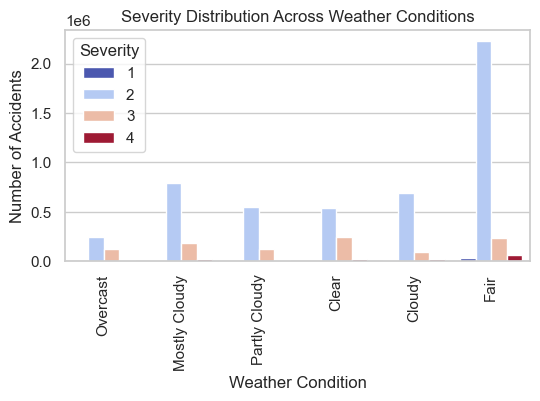

In [29]:
top_weather = dataset["Weather_Condition"].value_counts().head(6).index
filtered = dataset[dataset["Weather_Condition"].isin(top_weather)]

sns.countplot(
    x="Weather_Condition",
    hue="Severity",
    data=filtered,
    palette="coolwarm"
)

plt.xticks(rotation=90)
plt.title("Severity Distribution Across Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()


3. Severity vs Types of Road 

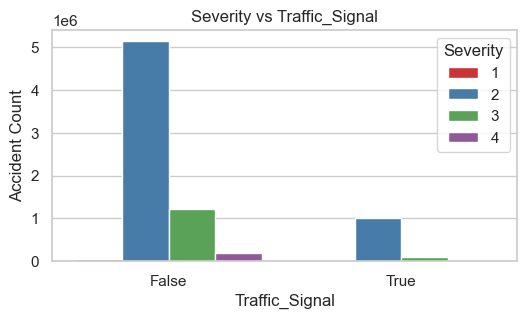

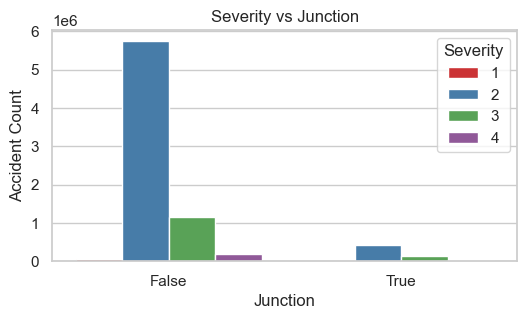

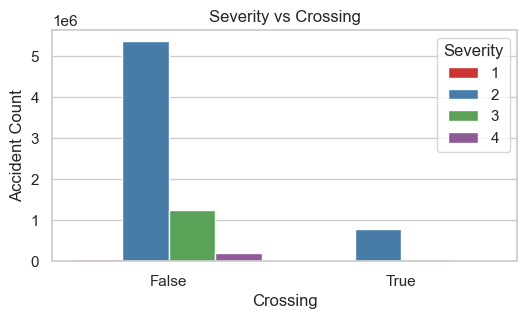

In [30]:
features = ["Traffic_Signal", "Junction", "Crossing"]

for feature in features:
    sns.countplot(
        x=feature,
        hue="Severity",
        data=dataset,
        palette="Set1"
    )
    plt.title(f"Severity vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Accident Count")
    plt.show()


4. Severity vs Traffic Congestion

C:\Users\acer\AppData\Local\Temp\ipykernel_3820\4159592334.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


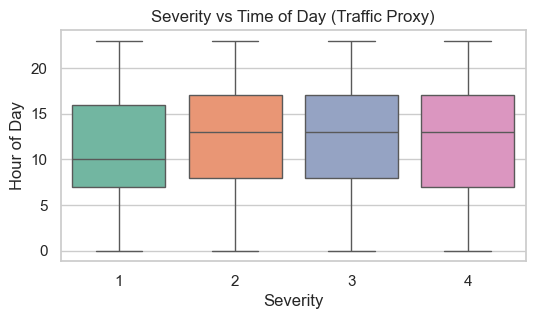

In [31]:
sns.boxplot(
    x="Severity",
    y="Hour",
    data=dataset,
    palette="Set2"
)

plt.title("Severity vs Time of Day (Traffic Proxy)")
plt.xlabel("Severity")
plt.ylabel("Hour of Day")
plt.show()


# Multivariate Analysis

1. Correlation Analysis

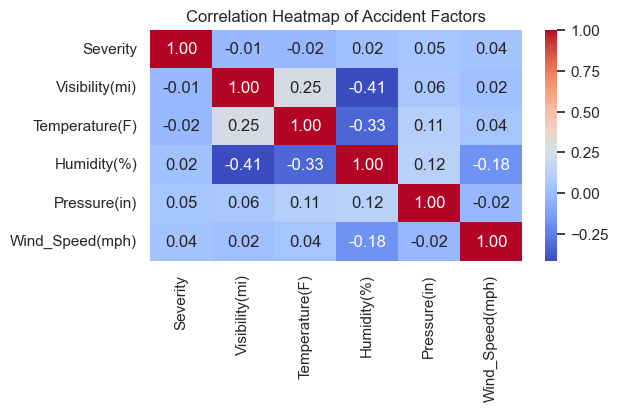

In [32]:
num_cols = [
    "Severity",
    "Visibility(mi)",
    "Temperature(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Wind_Speed(mph)"
]

corr = dataset[num_cols].corr()

sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap of Accident Factors")
plt.show()
